In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import scipy.stats as st
import matplotlib
from tqdm import tqdm
import pickle
import scipy
from scipy.optimize import curve_fit
from derivative_decay import *
import IPython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# dimensions to try
Ns = [int(t) for t in np.linspace(50, 1000, 15)]

# how much repetitions for each experiment are needed?
repetitions = 1

print('Sizes', Ns)
print('Repetitions', repetitions)
print('Total runs', len(Ns) * repetitions)

Sizes [50, 117, 185, 253, 321, 389, 457, 525, 592, 660, 728, 796, 864, 932, 1000]
Repetitions 1
Total runs 15


In [7]:
# list of things to compute for each experiment
to_run = [mean_d2Ldy2, mean_dLdy, show_neurons_1, dataset_metrics, W_inf_norm]
# parameters for each experiment
parameters = {'reg_coeff': 0, 'reg_type': None, 'do_print': 'plot', 'epochs': 15,
             'experiment': FashionMNISTExperiment}

  0%|          | 0/15 [00:00<?, ?it/s]

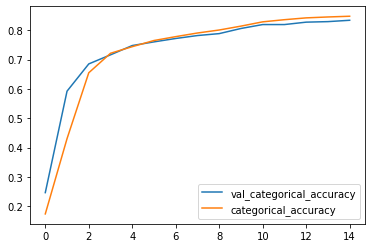

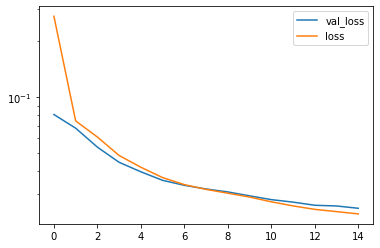

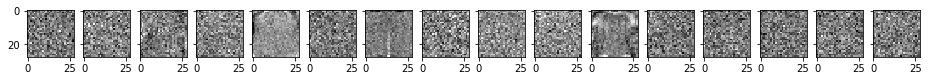

  7%|▋         | 1/15 [00:12<03:01, 12.98s/it]

{'val_acc': 0.8342000007629394, 'train_acc': 0.8479666660229365, 'val_loss': 0.025187749415636063, 'train_loss': 0.02348767484848698}


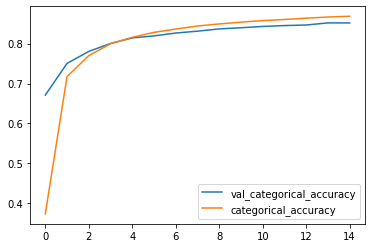

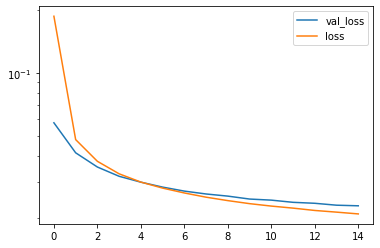

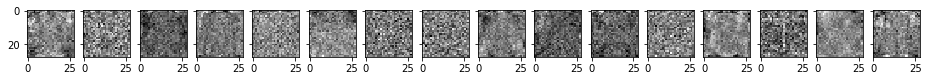

 13%|█▎        | 2/15 [00:25<02:48, 12.99s/it]

{'val_acc': 0.8516000032424926, 'train_acc': 0.8683333337306977, 'val_loss': 0.023009737394750117, 'train_loss': 0.021034987208743892}


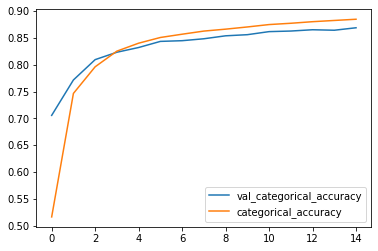

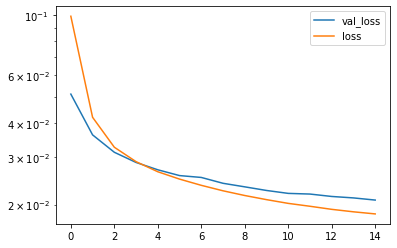

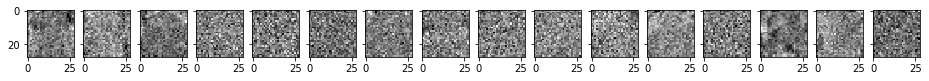

 20%|██        | 3/15 [00:33<02:17, 11.47s/it]

{'val_acc': 0.8689999938011169, 'train_acc': 0.884883334239324, 'val_loss': 0.02078227512538433, 'train_loss': 0.018476049322634934}


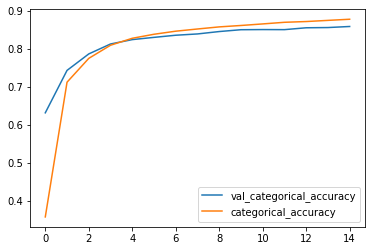

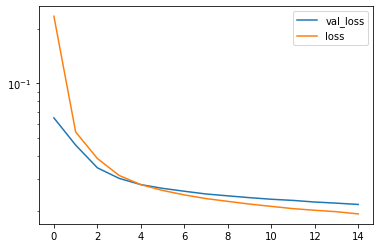

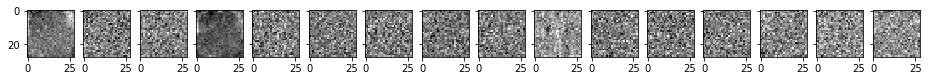

 27%|██▋       | 4/15 [00:44<02:02, 11.10s/it]

{'val_acc': 0.859799998998642, 'train_acc': 0.878833332657814, 'val_loss': 0.021608002297580243, 'train_loss': 0.019170096640785537}


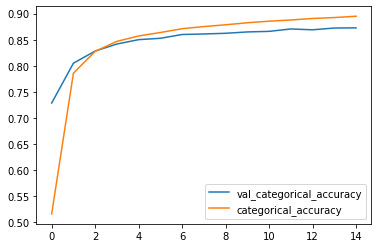

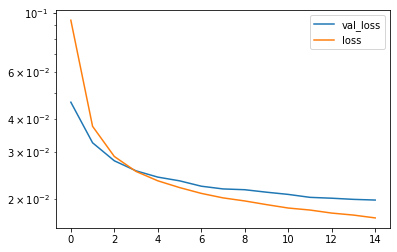

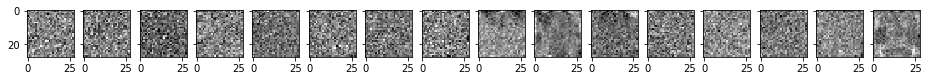

 33%|███▎      | 5/15 [00:59<02:04, 12.49s/it]

{'val_acc': 0.8726999998092652, 'train_acc': 0.8950166672468185, 'val_loss': 0.019766329042613506, 'train_loss': 0.01693454513636728}


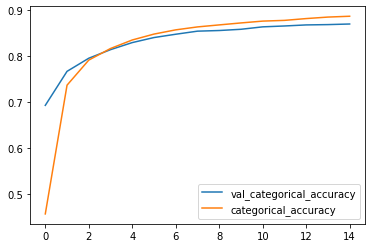

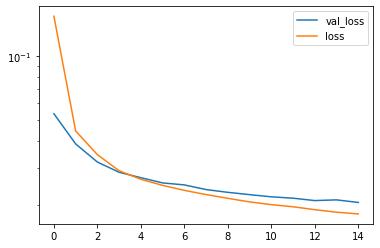

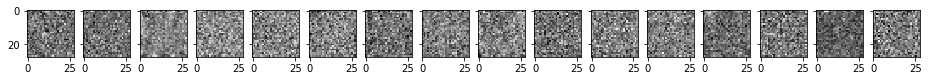

 40%|████      | 6/15 [01:12<01:53, 12.62s/it]

{'val_acc': 0.8704000115394592, 'train_acc': 0.8873166680335999, 'val_loss': 0.0206143531948328, 'train_loss': 0.01822095541283488}


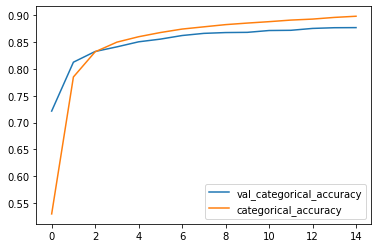

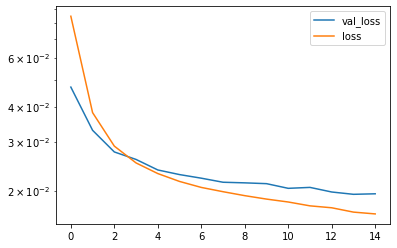

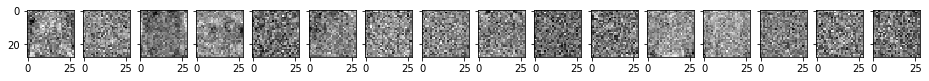

 47%|████▋     | 7/15 [01:21<01:31, 11.38s/it]

{'val_acc': 0.8766000032424927, 'train_acc': 0.8977499971787135, 'val_loss': 0.01949367355555296, 'train_loss': 0.016509561814988652}


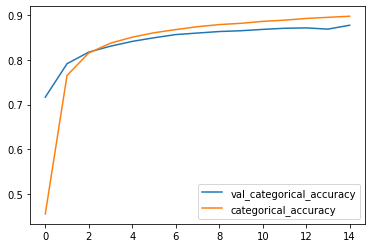

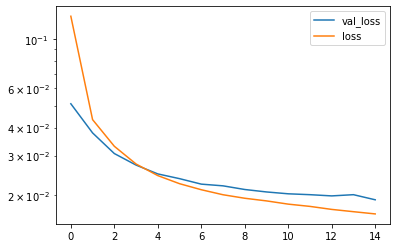

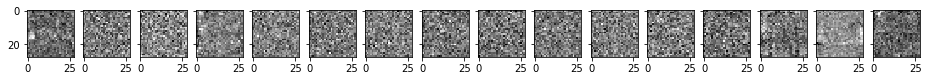

 53%|█████▎    | 8/15 [01:29<01:12, 10.32s/it]

{'val_acc': 0.8775999963283538, 'train_acc': 0.897749999165535, 'val_loss': 0.019015098921954632, 'train_loss': 0.01643411739108463}


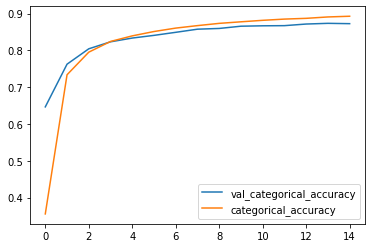

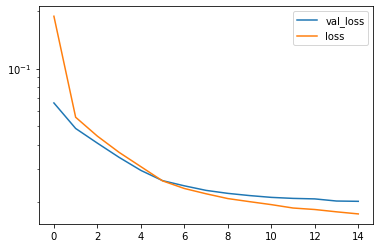

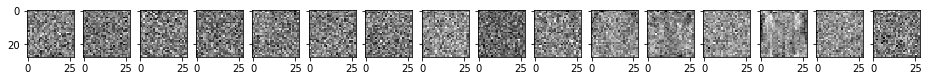

 60%|██████    | 9/15 [01:38<00:59,  9.99s/it]

{'val_acc': 0.8725000023841858, 'train_acc': 0.8926666676998138, 'val_loss': 0.020248213782906532, 'train_loss': 0.017400906886905432}


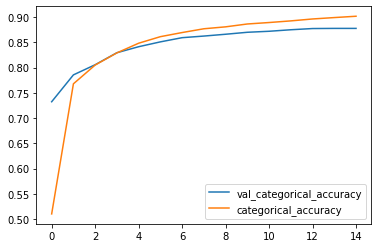

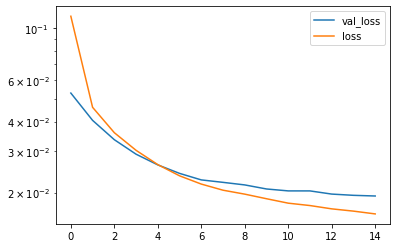

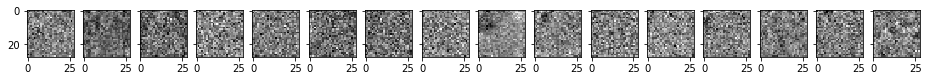

 67%|██████▋   | 10/15 [01:47<00:48,  9.61s/it]

{'val_acc': 0.8776999950408936, 'train_acc': 0.9017666677633921, 'val_loss': 0.019370418228209018, 'train_loss': 0.016261791779349246}


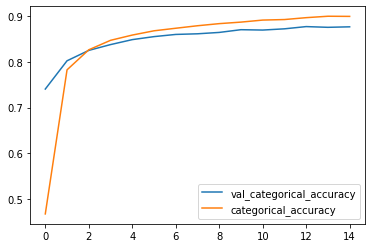

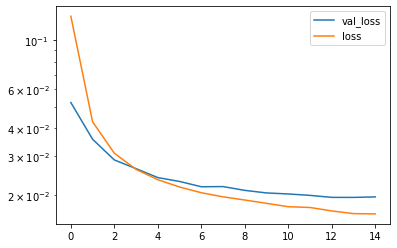

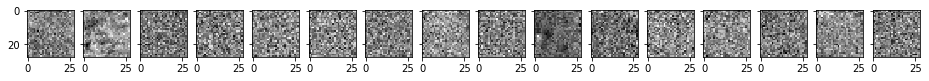

 73%|███████▎  | 11/15 [01:55<00:37,  9.35s/it]

{'val_acc': 0.8771000027656555, 'train_acc': 0.8999833355347315, 'val_loss': 0.019630460627377035, 'train_loss': 0.016446432874848444}


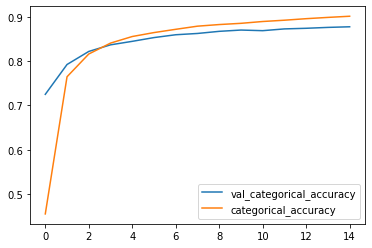

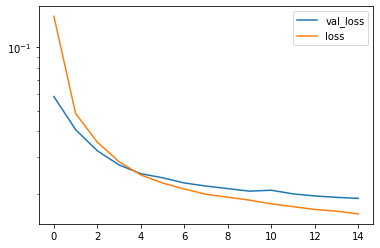

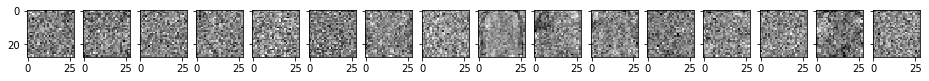

 80%|████████  | 12/15 [02:05<00:28,  9.43s/it]

{'val_acc': 0.8777000069618225, 'train_acc': 0.9014999975760778, 'val_loss': 0.01910511925816536, 'train_loss': 0.016113919982065756}


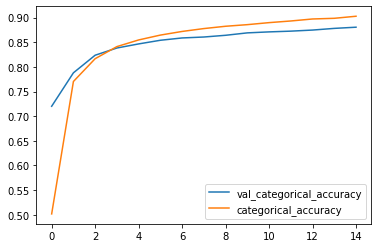

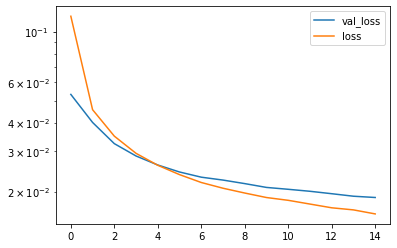

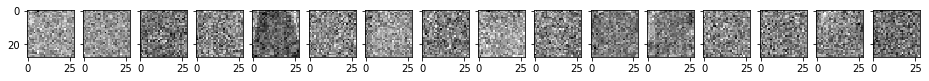

 87%|████████▋ | 13/15 [02:14<00:18,  9.36s/it]

{'val_acc': 0.8803999900817872, 'train_acc': 0.9026166697343191, 'val_loss': 0.01885220520198345, 'train_loss': 0.015981753915548326}


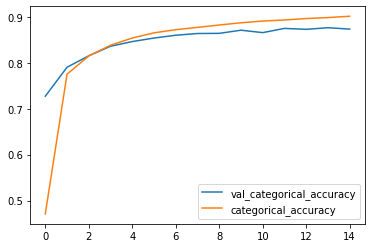

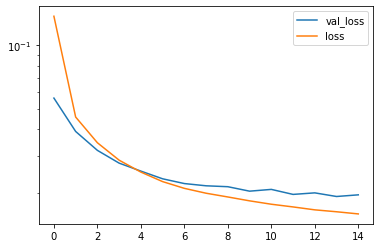

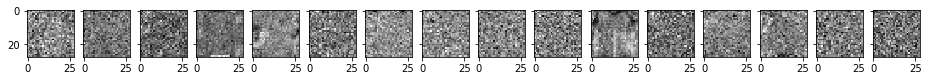

 93%|█████████▎| 14/15 [02:23<00:09,  9.18s/it]

{'val_acc': 0.873800003528595, 'train_acc': 0.9018333335717519, 'val_loss': 0.019664369896054266, 'train_loss': 0.015983847885703048}


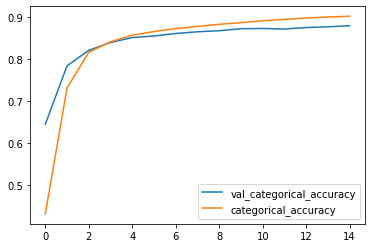

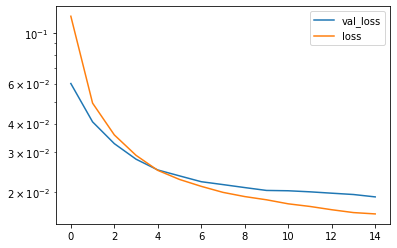

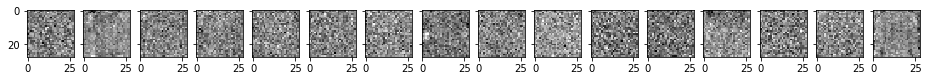

100%|██████████| 15/15 [02:32<00:00, 10.19s/it]

{'val_acc': 0.8791999995708466, 'train_acc': 0.9018000026543935, 'val_loss': 0.019035879150033, 'train_loss': 0.016022662880520025}


In [6]:
# measuring...
results = get_results(Ns, repetitions, parameters, to_run)

In [7]:
pickle_w(results, "DerivativeWeightDecay-FC-MNIST-Fashion")

In [8]:
# loading results from a file
results = pickle_r("DerivativeWeightDecay-FC-MNIST-Fashion")

In [9]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

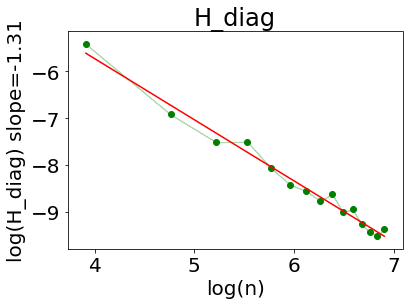

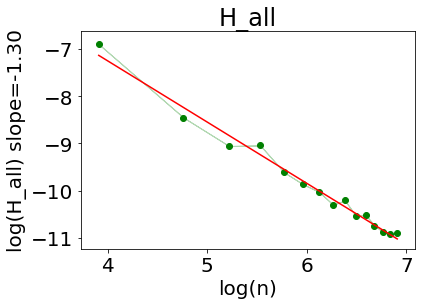

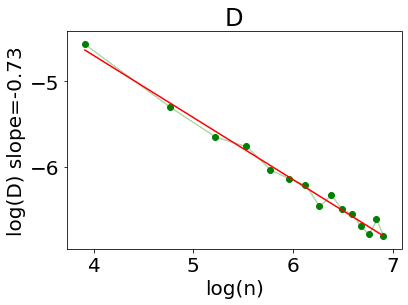

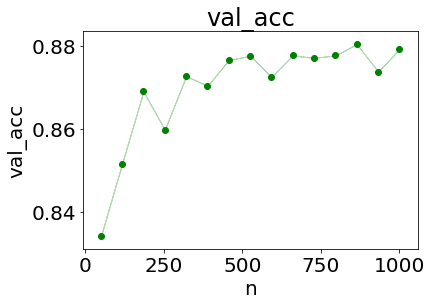

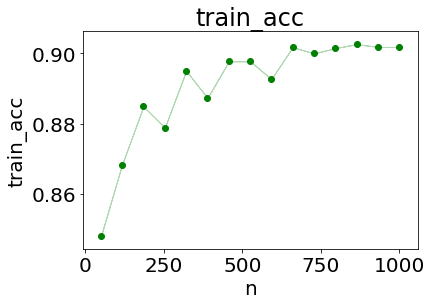

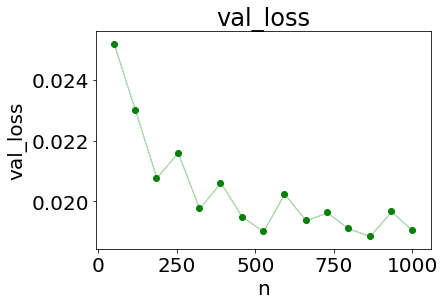

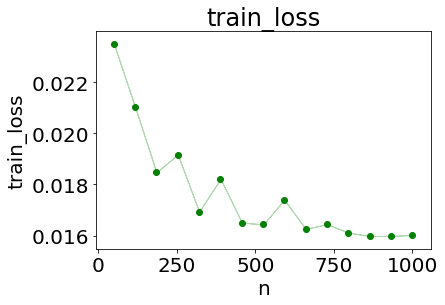

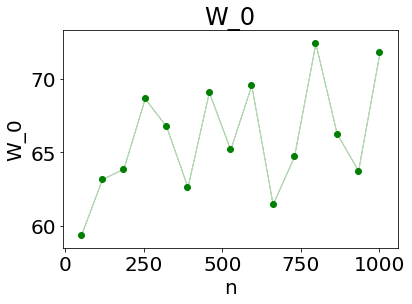

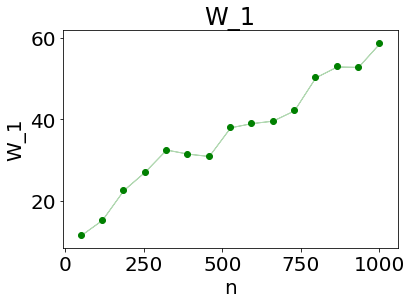

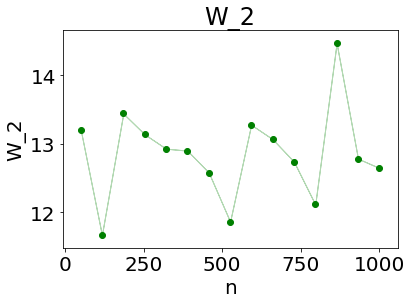

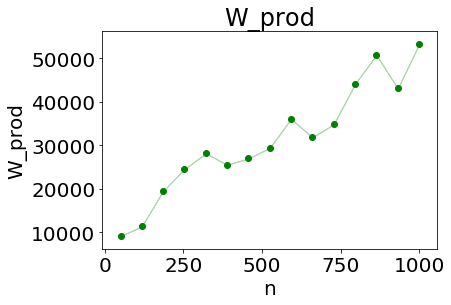

In [11]:
plot_results(Ns, results, name = 'DerivativeWeightDecay-FC-MNIST-Fashion')

All derivatives decay as they should? The slope is a bit off for Hessians and D.

**Derivative:** expected slope 1, got slope 0.73

**Hessian:** expected slope 2, got slope 1.30

W_prod increasing